<a href="https://colab.research.google.com/github/Jyotibaberwal/Matrix-computation-for-data-science/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
**Write functions from scratch to solve a system of linear equations using**

**● Gauss Seidel Method**

**Your implementation should be general to handle any number of equations and variables.**

  **Check your implementation on the following test problem:**

**2.412x + 9.879y + 1.564z = 4.89**

**1.876x + 2.985y − 11.62z = −0.972**

**12.214x + 2.367y + 3.672z = 7.814**

**Compare the number of iterations required until convergence using**
**Jacobi’s Iterative Method (lab-5 question-2)**

**Gauss Seidel Method**

**use error tolerance of 10^-5 . Also, draw the convergence plot for each method.**

1.759782758733612
Solution: [ 0.61395321 -0.15136515 -0.61222451]
[ 0.61394953 -0.15136855 -0.61222163]


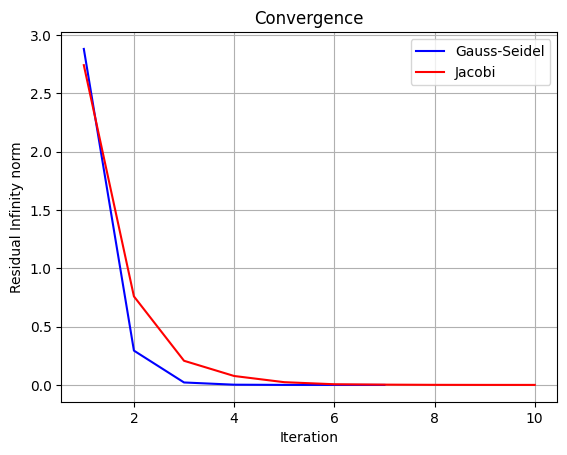

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel(A, b, iteration, tol):
    n = b.size
    x = np.zeros(n)
    residuals = []
    for k in range(iteration):
        for i in range(n):
            x_new = b[i]
            for j in range(n):
                if j != i:
                    x_new -= A[i][j] * x[j]
            x_new /= A[i][i]
            x[i] = x_new

        residual = np.linalg.norm(b-np.dot(A,x),np.inf)
        residuals.append(residual)

        if residual < tol:
            return x, residuals

    return x, residuals

def jacobi(A, b, iteration, tol):
    n = b.size
    x = np.zeros(n)
    residuals = []
    for k in range(iteration):
        x_new = np.zeros(n)
        for i in range(n):
            x_new[i] = b[i]
            for j in range(n):
                if j != i:
                    x_new[i] -= A[i][j] * x[j]
            x_new[i] /= A[i][i]

        residuals.append(np.linalg.norm(b - np.dot(A, x_new)))

        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, residuals

        x = x_new

    return x, residuals

A = np.array([[12.21, 2.367, 3.672],
              [2.412, 9.879, 1.564],
              [1.876, 2.985, -11.62]])
b = np.array([4.89, -0.972, 7.814])
K = 10
tol = 1e-5

print(np.linalg.cond(A))

solution_gauss, residuals_gauss = gauss_seidel(A, b, K, tol)
print("Solution:", solution_gauss)

solution_jacobi, residuals_jacobi = jacobi(A, b, K, tol)
print(solution_jacobi)

plt.plot(range(1,len(residuals_gauss)+1),residuals_gauss,label = 'Gauss-Seidel',color = 'b')
plt.plot(range(1,len(residuals_jacobi)+1),residuals_jacobi,label = 'Jacobi',color = 'r')
plt.xlabel('Iteration')
plt.ylabel('Residual Infinity norm')
plt.title('Convergence')
plt.grid('True')
plt.legend()
plt.show()

# Question 2
**Write a program to generate the Hilbert matrix of the following type:**

**where   A[i][j] = 1/ i+j-1**

**It is a n×n square matrix, where n is the input by the user. Find the condition
number of the generated matrix and then solve the system Ax = b using both
methods (Jacobi’s Iterative and Gauss Seidel Method) for x, where b is given as:**

**b[i] = A[i][j] + A[i][j+1]  ....**

**Compare and plot the convergence of both methods until error tolerance.
Comment with justification, whether the convergence of these methods is
affected by the condition number or not.**

524.0567775860644
Solution: [0.94702888 1.27106265 0.74945688]
[ 0.14216066  0.07878529 -0.02422314]


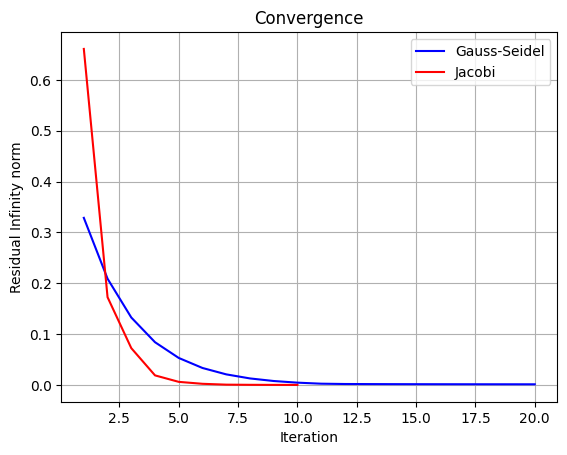

In [30]:
import numpy as np

def hilbert_matrix(n):
  A = np.zeros((n,n))
  for i in range(1,n+1):
    for j in range(1,n+1):
      A[i-1][j-1] = 1/(i+j-1)

  return A

def generate_b(n):
  A = hilbert_matrix(n)
  b = np.zeros(n)
  for i in range(n):
    for j in range(n):
      b[i] += A[i][j]

  return b

H = hilbert_matrix(3)
b = generate_b(3)
K = 20
tol = 1e-5

print(np.linalg.cond(H))

solution_gauss, residuals_gauss = gauss_seidel(H, b, K, tol)
print("Solution:", solution_gauss)

solution_jacobi, residuals_jacobi = jacobi(A, b, K, tol)
print(solution_jacobi)

plt.plot(range(1,len(residuals_gauss)+1),residuals_gauss,label = 'Gauss-Seidel',color = 'b')
plt.plot(range(1,len(residuals_jacobi)+1),residuals_jacobi,label = 'Jacobi',color = 'r')
plt.xlabel('Iteration')
plt.ylabel('Residual Infinity norm')
plt.title('Convergence')
plt.grid('True')
plt.legend()
plt.show()

# Question 3
**Consider a system of linear equation Ax = b defined as:**

**1.001x + 1y = 1**

**1x + 1y = 1**

**a. Solve the above system for the value of x.**

**b. Let b′ = [1.01 0.99]. Solve the system Ax = b′ and compare the difference
in the value of x from both parts. Is the value the same or different? Give
proper justification for the answer.**

reference https://courses.engr.illinois.edu/cs357/fa2019/references/ref-8-condition/

In [26]:
import numpy as np

A = np.array([[1.001,1],
              [1,1]])
b = np.array([1,1])
x = np.linalg.solve(A,b)

print(x)

b_new = np.array([1.01,0.99])
x_new = np.linalg.solve(A,b_new)

print(x_new)

print(np.linalg.cond(A))


[0. 1.]
[ 20.   -19.01]
4002.0007501258556


The significant difference in solutiion arises due to the high condition number, due to which the matrix A is highly sensitive to the vector b.